<a href="https://colab.research.google.com/github/Saaniya19/Clothes-Folding-Robot/blob/main/rockPaperScissorsModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/rps.zip \
    -O /tmp/rps.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2023-08-22 00:47:24--  https://storage.googleapis.com/learning-datasets/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 74.125.137.128, 142.250.101.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   256MB/s    in 0.7s    

2023-08-22 00:47:25 (256 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2023-08-22 00:47:25--  https://storage.googleapis.com/learning-datasets/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 74.125.137.128, 142.250.101.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/rps-tes

**Importing all libraries and directories below**

In [7]:
import os
import zipfile   # so we can unzip the files
import tensorflow as tf
import keras.preprocessing    # keras is a high level NN library that runs on top of tensorflow
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator     # to generate more images from the training images
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from IPython.display import Image    # to capture image using camera
import numpy as np
from google.colab import files
import keras.utils as image

**Unzipping all training and testing files**

In [8]:
local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

total training rock images: 840
total training paper images: 840
total training scissors images: 840


**Training from image data**

In [9]:
# when training in tensorflow using an image data generator
# it will automatically label the images based on the name of their parent directory

# training set generator
TRAINING_DIR = "/tmp/rps/"
# ImageDataGenerator is a keras class that creates variations of training images for model generalization
training_datagen = ImageDataGenerator(
    # the following are the parameters by which it creates variations of the training images
    # eg. randomly rotating by some number of degrees, shifting horizontally or vertically, zooming, etc.
      # rescale = 1./255,
	    # rotation_range=40,
      # width_shift_range=0.2,
      # height_shift_range=0.2,
      # shear_range=0.2,
      # zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# test set generator
VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
 # set to categorical because its a multiclass classification problem (rock, paper and scissors)
	class_mode='categorical',
 # batch size is the num of images that will be loaded and processed together as a batch
  batch_size=126
)

model = tf.keras.models.Sequential([
    # the input shape is a 150 x 150 pixels image with 3 bytes color
    # this is the first convolution (with Max Pooling)
    # output shape is 3 because there are 3 classifications: rock, paper, scissors
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # the second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # the third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # the fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # flatten the results to feed into a DNN
    # dropout helps to improve the efficiency of the NN by throwing away unnescessary neurons
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # two dense layers in NN
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # 3 because there are three classifications (rock, paper, scissors)
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=15, steps_per_epoch=10, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                       

**Capturing photo from camera**

<IPython.core.display.Javascript object>

Saved to photo.jpg


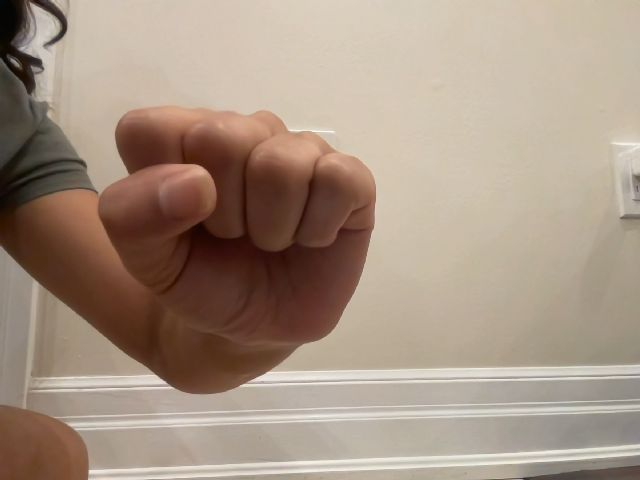

In [13]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename


filename = take_photo()
print('Saved to {}'.format(filename))

# Show the image which was just taken.
display(Image(filename))

**Predicting rock, paper or scissors from captured image**

In [16]:
# predicting images
path = "/content/photo.jpg"
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=2)
if classes[0][0] == max(classes[0]):
  print("Prediction: Paper")
  print("Computer Move: Scissors")
if classes[0][1] == max(classes[0]):
  print("Prediction: Rock")
  print("Computer Move: Paper")
if classes[0][2] == max(classes[0]):
  print("Prediction: Scissors")
  print("Computer Move: Rock")

1/1 [==============================] - 0s 40ms/step
Prediction: Rock
Computer Move: Paper
